In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('ticks')
from statannot import add_stat_annotation


In [2]:
PROPS = {
    'boxprops':{ 'edgecolor':'#929292', 'linewidth':2 }, 
    'medianprops':{'color':'#929292'},
     'whiskerprops':{'color':'#929292'},
}

flierprops = dict(marker='o', markerfacecolor='#929292', markersize=3,  markeredgecolor='grey')
colors = ['#d3d3d3','#AFE4DE','#ffa07a','#fff157']

def plot(features, order, names, dir_name, plot_type, figsize = (3,3),
       palette = ['#D3D3D3','#AFE4DE','#FAA07A','#FCFBCB'],
        sig = False):
    
    i = 0
    for feature in features :
        plt.figure(figsize = (4,4))
        plt.rcParams['axes.edgecolor'] = '#D3D3D3'
        name = 'disease_'+names[i]+'.pdf'
        
        if plot_type == 'bar':
            plt.figure(figsize = figsize)
            ax = sns.barplot(
            data = pheno, x="Disease", y=feature,
            order = order,
            palette = palette,   
            capsize=.2, errcolor=".5", 
            linewidth=1, edgecolor=".5", 
            errwidth = 2,
            width=0.70

            )
            
        if plot_type == 'box':
                plt.figure(figsize = figsize)
                ax = sns.boxplot(
                data = pheno, x="Disease", y=feature,
                order = order,
                palette = palette,             
                width = 0.5, 
                flierprops = flierprops, 
                showcaps=False,
                **PROPS
            )
            
        if plot_type == 'violin' :
            plt.figure(figsize = figsize)
            ax = sns.violinplot(
            data = pheno, x="Disease", y=feature,
            order = order,
            palette = palette,             
            width = 0.6, 
            flierprops = flierprops, 
            # showcaps=False,
            **PROPS
    )
            
        if plot_type == 'boxen':
            plt.figure(figsize = figsize)
            ax = sns.boxenplot(
            data = pheno, x="Disease", y=feature,
            order = order,
            palette = palette,             
            width = 0.6, 
            flier_kws = dict(marker='o', edgecolors='grey',linewidths = 0, c = None, s = 5),
            line_kws = {'color':'#929292', 'linewidth': 1}

    )
            
        if plot_type == 'swarm' :
            ax = sns.swarmplot(
                data = pheno, x="Disease", 
                y=feature,
                order = order,
                 palette = palette,             
                size = 2,
                # edgecolor='#929292', linewidth=0.5, 

    )
            
        if plot_type == 'strip':
            ax = sns.stripplot(
                data = pheno, x="Disease", y=feature,
                order = order,
                palette = palette,             
                size = 1.5

    )
            
        box_pairs = [("Control", "Asthma"), 
                    ("Control", "COPD"),
                    ("Control", "ACO")]
        if sig:
            box_pairs = [
                        ("Control", "Asthma"), 
                        ("Control", "COPD"),
                        ("Control", "ACO"),
                        ("COPD","ACO"),
            ]

        add_stat_annotation(ax, data=pheno, x="Disease", y=feature, order =  order,
                            box_pairs = box_pairs,
                            test='Mann-Whitney', 
                            #test = "t-test_ind",
                            comparisons_correction=None, 
                            text_format='star', 
                            loc='outside',
                            verbose = 1,
                            line_height=0,#0.03,
                            text_offset=2,
                            color = 'grey',
                            fontsize = 14
                            )
        
        for dis, grp in pheno.groupby('Disease'):
            if dis == 'ACO':
                aco = grp[feature].sum()/len(grp)
            elif dis == 'COPD':
                copd = grp[feature].sum()/len(grp)
            elif dis == 'Asthma':
                asthma = grp[feature].sum()/len(grp)
            elif dis == 'Control':
                ctrl = grp[feature].sum()/len(grp)


        data = [0, ctrl, asthma, copd, aco]
        trend = mk.original_test(data)
        print(feature + ' ' +str(trend.trend) +' '+ str(np.round(trend.p, 4)))

        ylab = names[i]

        plt.ylabel(ylab, fontsize = 16, fontweight = 'bold')
        plt.xlabel('Disease', fontsize = 16, fontweight = 'bold')
        plt.xticks(fontsize=14, rotation = 30)
        plt.yticks(fontsize=14)
        plt.savefig(dir_name+feature+'.pdf', dpi=300, bbox_inches='tight')
        i = i + 1
        plt.show()
        
    

In [3]:
df = pd.read_csv('Supplementary/de_genes_patients.csv')
df.columns = ['Genes'] + list(df.columns[1:])
df = df.set_index(['Genes'])

meta = pd.read_csv('Data/meta_subset.tsv', sep='\t')#.set_index(['Unnamed: 0'])
meta.loc[meta.condition == 'High', 'condition'] = '2.High'
meta.loc[meta.condition == 'Low', 'condition'] = '1.Low'
meta = meta.sort_values('condition')
meta

,Unnamed: 0,basevitdng,wk32to38vitdng,mayocbloodvitd,condition,deliverydate,site,bdeath,trmt,cgender,cethnicity,crace,craceeth,clusters
48,191766,19.0,23.70,19.0,1.Low,01/02/2012,1.0,No,B,Male,Not_Hispanic_or_Latino,White,CaucasianNonHispanic,1
69,317551,8.5,6.62,2.0,1.Low,05/24/2011,3.0,No,B,Male,Not_Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,1
68,311409,21.6,14.90,8.3,1.Low,12/22/2010,3.0,No,B,Male,Not_Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,1
67,311394,10.2,22.60,13.0,1.Low,06/16/2010,3.0,No,A,Male,Not_Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,1
66,214979,13.0,18.90,14.0,1.Low,02/15/2011,2.0,No,B,Female,Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,210815,26.9,27.70,26.0,2.High,05/04/2010,2.0,No,A,Male,Not_Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,0
20,210804,25.1,30.50,27.0,2.High,05/22/2010,2.0,No,B,Female,Not_Hispanic_or_Latino,Black__African_American,AfricanAmericanHispanicandNonHispanic,0
19,210482,27.5,44.80,30.0,2.High,05/09/2010,2.0,No,A,Male,Not_Hispanic_or_Latino,White,CaucasianNonHispanic,0
17,195901,36.9,48.10,49.0,2.High,12/26/2010,1.0,No,A,Female,Hispanic_or_Latino,Other,Other,0


In [4]:
df_colors = meta[['Unnamed: 0', 'condition']]
df_colors['Patients'] = df_colors.index.values
df_colors = df_colors.set_index(['Unnamed: 0'])
colors = {'1.Low':'#80e454',#'#61de2a',#'#fffd74',#'lightcoral',#'crimson',
             '2.High':'#ff668c'}#'deeppink'} #'#9be5aa',#'#51b73b', #'mediumaquamarine',#'chartreuse',#'lightgreen',}

colors = {'1.Low':'#9ce3dd',
         '2.High':'#fbb19f'}
rcolors = meta['condition'].map(colors)


/udd/revfa/.conda/envs/cdnm-jupyter-python-3.7.6-R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
meta['Unnamed: 0'] = meta['Unnamed: 0'].astype(str)
meta = meta.set_index(['Unnamed: 0'])

/udd/revfa/.conda/envs/cdnm-jupyter-python-3.7.6-R/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


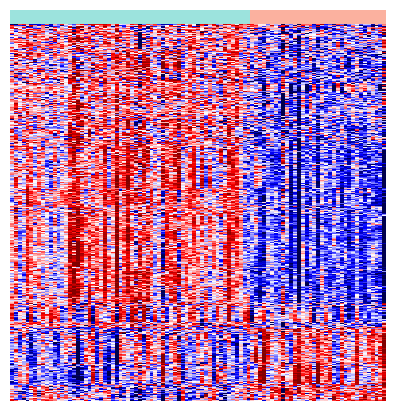

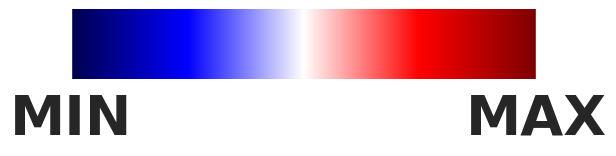

In [6]:
sns.set(font_scale= 0.3)
annot_kws={'fontsize':12, 
           #'fontstyle':'italic',  
           'color':'#0cff0c',#"springgreen",
           #'alpha':0.6 , 
            'weight': 'bold',
           "size": 16
           #"ha": 'center',"va": 'bottom'
          # 'verticalalignment':'top',
           #'backgroundcolor':'w'
          }

cmap = sns.diverging_palette(0, 175, sep= 20, as_cmap=True)


res = sns.clustermap(df[meta.index],
                    figsize = (5,5),
                    row_cluster = True,
                    col_cluster = False,
                     fmt = '', 
                     annot_kws= annot_kws,
                     cmap =  'seismic',
                     col_colors = rcolors.values,
                     center = 0,
                     z_score = 0,
                     yticklabels=False, 
                     xticklabels=False, 
                    vmin = -2, vmax = 2)

res.ax_row_dendrogram.set_visible(False)
res.ax_col_dendrogram.set_visible(False)
res.cax.set_visible(False)
res.ax_heatmap.set_xlabel('')
res.ax_heatmap.set_ylabel('')

plt.savefig('Figures/Fig1B.png',  bbox_inches='tight')


cmap = 'seismic'
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.cm.get_cmap(cmap)
colors = cmap(np.arange(cmap.N))

fig, ax = plt.subplots(1, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
ax.set(frame_on=False)

ax.imshow([colors], extent=[0, 10, 2, 0.5])
xmarks = [0,10]
ax.set_xticks(xmarks)
ax.set_xticklabels(['MIN', 'MAX'], fontsize=40, fontweight='bold')


plt.savefig('Figures/cbar.pdf',bbox_inches='tight')



In [7]:
tmp = list(df.index.dropna())
[name for name in tmp if 'CYP' in name]

['CYP4A22-AS1', 'CYP1B1', 'CYP4F3', 'CYP1B1-AS1']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1.Low v.s. 2.High: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.972e-07 U_stat=1.778e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1.Low v.s. 2.High: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.881e-08 U_stat=1.834e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1.Low v.s. 2.High: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.442e-12 U_stat=2.028e+03


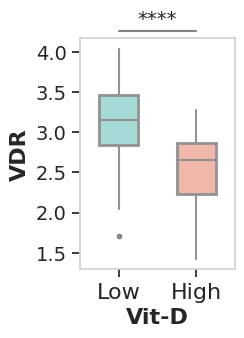

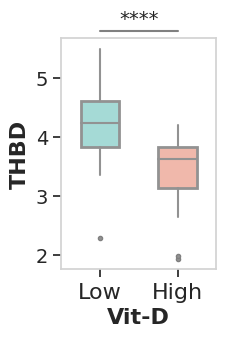

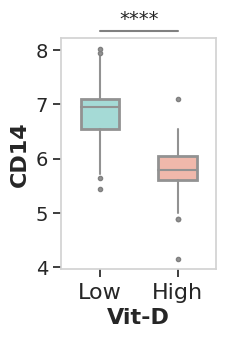

In [8]:
sns.set(font_scale= 1)
sns.set_style('ticks')

palette = ['#9ce3dd','#fbb19f']# '#FDD9D0']
plt.rcParams['axes.edgecolor'] = '#D3D3D3'

order = ['1.Low','2.High']
box_pairs =  [('1.Low', '2.High')]


# genes = ['ITGAM','THBD','VDR',#'RARA', 
#          'CYP1B1',
#          # 'NINJ1',
#          'CAMP','KLF4',#'ALOX5',
#          'BCL6','CD14','CEACAM1','CEBPA',
#          # 'HIF1A','IRF5'
#         ]

genes = ['VDR', 'THBD', 'CD14']

tmp = df.loc[genes].T 
tmp['Vitamin D'] = meta.loc[tmp.index,'condition']

# genes = ['VDR','NINJ1','KLF4']# 'RARA','CYP1B1']
import os
for gene in genes:
    plt.figure(figsize = (2,3))
    
    name = os.path.join('Figures','Fig1C_' +gene + '.pdf')

    ax = sns.boxplot(
        data = tmp,
        y= gene, 
        x='Vitamin D',
        order = order,
        palette = palette,             
        width = 0.5, 
        flierprops = flierprops, 
        showcaps=False,
        **PROPS
    )


    add_stat_annotation(ax, data=tmp, x="Vitamin D", y= gene, order =  order,
                                 box_pairs = box_pairs,
                                test='Mann-Whitney', 
                                #test = "t-test_ind",
                                # comparisons_correction=None, 
                               text_format='star', 
                               loc='outside',
                               verbose = 1,
                               line_height=0,#0.03,
                               text_offset=2,
                               color = 'grey',
                               fontsize = 14
                               )

    plt.ylabel(gene, fontsize = 16, fontweight = 'bold')
    plt.xlabel('Vit-D', fontsize = 16, fontweight = 'bold')
    plt.xticks(np.arange(2), ['Low','High'],fontsize=16)
    plt.yticks(fontsize=14)
    plt.savefig(name, dpi=300, bbox_inches='tight',transparent=True)